# **Análisis Exploratorio de Datos de Salud de Estados Unidos**
## **NHANES 2009-2012**

---

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Javeriana.svg" width="300">

---

## **Información del Proyecto**

**Curso:** Gestión de Datos  
**Grupo:** Anderson Alvarado, Maria Paula y Camila  
**Dataset:** National Health and Nutrition Examination Survey (NHANES) 2009-2012  
**Período de análisis:** 2009-2012  

---

## **Tabla de Contenidos**

1. [Instalación y Configuración](#1-instalacion-y-configuracion)
2. [Carga y Descripción de los Datos](#2-carga-y-descripcion-de-los-datos)
3. [Exploración y Análisis Exploratorio](#3-exploracion-y-analisis-exploratorio)
4. [Preparación y Limpieza de los Datos](#4-preparacion-y-limpieza-de-los-datos)
5. [Transformación de Datos](#5-transformacion-de-datos)
6. [Modelado Predictivo](#6-modelado-predictivo)
7. [Conclusiones y Hallazgos](#7-conclusiones-y-hallazgos)

---

## **Resumen Ejecutivo**

Este análisis examina los datos de la Encuesta Nacional de Examen de Salud y Nutrición (NHANES) de Estados Unidos correspondientes al período 2009-2012. El objetivo principal es explorar patrones de salud, identificar factores de riesgo y desarrollar modelos predictivos para variables relacionadas con la salud pública.

### **Objetivos Principales:**
- Analizar la distribución y calidad de los datos de salud
- Identificar patrones y correlaciones entre variables de salud
- Realizar transformaciones de datos apropiadas
- Desarrollar modelos predictivos para BMI y diabetes
- Proporcionar insights para políticas de salud pública

# **1. Instalación y Configuración**

En esta sección se instalan y configuran todas las librerías necesarias para el análisis de datos de salud.

In [45]:
%pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from IPython.display import display
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configuramos estilo de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# **2. Carga y Descripción de los Datos**

El dataset NHANES (National Health and Nutrition Examination Survey) es una encuesta representativa a nivel nacional que evalúa el estado de salud y nutrición de adultos y niños en Estados Unidos. Los datos corresponden al período 2009-2012.

In [4]:
df_nhanes = pd.read_csv("Data/NHANES2009-2012.csv")
df_nhanes.head()

,SurveyYr,ID,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
0,2009_10,55829,female,28,20-29,343.0,White,NaN,CollegeGrad,Married,...,15.0,No,NaN,Yes,Yes,13.0,20.0,1.0,No,Heterosexual
1,2009_10,57112,male,14,10-19,170.0,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009_10,60232,male,80,NaN,NaN,White,NaN,8thGrade,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009_10,59919,male,22,20-29,268.0,White,NaN,HighSchool,NeverMarried,...,10.0,Yes,10.0,Yes,Yes,18.0,3.0,1.0,No,Heterosexual
4,2009_10,56351,male,1,0-9,16.0,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Diccionario de Datos**

### **Variables Demográficas**
- **SurveyYr**: Año de la encuesta (2009_10, 2011_12)
- **ID**: Identificador único del participante
- **Gender**: Género (male, female)
- **Age**: Edad en años
- **Race3**: Raza/etnicidad
- **Education**: Nivel educativo
- **MaritalStatus**: Estado civil

### **Variables Socioeconómicas**
- **HHIncomeMid**: Ingreso medio del hogar (USD)
- **Poverty**: Relación de ingresos familiares con el nivel de pobreza
- **HomeRooms**: Número de habitaciones en el hogar
- **HomeOwn**: Propiedad de la vivienda
- **Work**: Estado laboral

### **Variables Antropométricas**
- **Weight**: Peso corporal (kg)
- **Height**: Altura (cm)
- **BMI**: Índice de Masa Corporal
- **Length**: Longitud recumbente (cm) - principalmente para bebés
- **HeadCirc**: Circunferencia cefálica (cm)

### **Variables de Salud Cardiovascular**
- **Pulse**: Frecuencia cardíaca (latidos/min)
- **BPSysAve**: Presión arterial sistólica promedio (mmHg)
- **BPDiaAve**: Presión arterial diastólica promedio (mmHg)

### **Variables de Laboratorio**
- **Testosterone**: Nivel de testosterona
- **DirectChol**: Colesterol directo
- **TotChol**: Colesterol total

### **Variables de Salud y Bienestar**
- **Diabetes**: Estado de diabetes
- **HealthGen**: Salud general auto-reportada
- **LittleInterest**: Poco interés en actividades
- **Depressed**: Sentimientos de depresión
- **SleepTrouble**: Problemas para dormir
- **SleepHrsNight**: Horas de sueño por noche

### **Variables de Actividad Física**
- **PhysActive**: Actividad física regular
- **PhysActiveDays**: Días de actividad física por semana
- **TVHrsDay**: Horas de televisión por día
- **CompHrsDay**: Horas de computadora por día

### **Variables de Sustancias**
- **SmokeNow**: Fumador actual
- **SmokeAge**: Edad de inicio del tabaquismo
- **Marijuana**: Uso de marihuana
- **RegularMarij**: Uso regular de marihuana
- **HardDrugs**: Uso de drogas duras
- **AlcoholDay**: Bebidas alcohólicas por día
- **AlcoholYear**: Días de consumo de alcohol por año

### **Variables de Salud Reproductiva**
- **SexEver**: Ha tenido relaciones sexuales
- **SexAge**: Edad de primera relación sexual
- **SexNumPartnLife**: Número de parejas sexuales en la vida
- **SameSex**: Relaciones del mismo sexo
- **SexOrientation**: Orientación sexual

# **3. Exploración y Análisis Exploratorio**

En esta sección realizamos un análisis exploratorio exhaustivo del dataset NHANES 2009-2012, examinando la estructura de los datos, distribuciones de variables, patrones y relaciones entre las diferentes variables de salud.

## **3.1 Estructura General del Dataset**

Análisis inicial de los tipos de variables presentes en el dataset y su distribución entre variables numéricas y categóricas.

In [5]:
num_cols = df_nhanes.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_nhanes.select_dtypes(include='object').columns.tolist()
print(f"Columnas numéricas: \n Total: {len(num_cols)} \n {num_cols}\n")
print(f"Columnas categóricas: \n Total: {len(cat_cols)} \n {cat_cols}\n")

Columnas numéricas: 
 Total: 45 
 ['ID', 'Age', 'AgeMonths', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'Weight', 'Length', 'HeadCirc', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'DiabetesAge', 'DaysPhysHlthBad', 'DaysMentHlthBad', 'nPregnancies', 'nBabies', 'Age1stBaby', 'SleepHrsNight', 'PhysActiveDays', 'TVHrsDayChild', 'CompHrsDayChild', 'AlcoholDay', 'AlcoholYear', 'SmokeAge', 'AgeFirstMarij', 'AgeRegMarij', 'SexAge', 'SexNumPartnLife', 'SexNumPartYear']

Columnas categóricas: 
 Total: 30 
 ['SurveyYr', 'Gender', 'AgeDecade', 'Race1', 'Race3', 'Education', 'MaritalStatus', 'HHIncome', 'HomeOwn', 'Work', 'BMICatUnder20yrs', 'BMI_WHO', 'Diabetes', 'HealthGen', 'LittleInterest', 'Depressed', 'SleepTrouble', 'PhysActive', 'TVHrsDay', 'CompHrsDay', 'Alcohol12PlusYr', 'SmokeNow', 'Smoke100', 'Smoke100n', 'Marijuana', 'RegularMarij'

In [6]:
# Grafica de cantidad de columnas numéricas y categóricas
def plot_distributions_cant(df):
    """
    Función que recibe un dataframe y muestra un gráfico de barras con la cantidad
    de columnas numéricas y categóricas.
    
    Parámetros:
    df (DataFrame): El dataframe a analizar
    """
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    
    counts = {'Numéricas': len(num_cols), 'Categóricas': len(cat_cols)}
    
    # agregarle color diferente a cada barra
    colors = ['royalblue', '#EF553B']
    fig = px.bar(x=list(counts.keys()), y=list(counts.values()),
                 labels={'x': 'Tipo de columna', 'y': 'Cantidad'},
                 title='Cantidad de columnas numéricas y categóricas',
                 text=list(counts.values()))
    fig.update_traces(marker_color=colors)
    fig.update_layout(title_x=0.5, title_font_size=20, 
                      xaxis_title_font_size=16, yaxis_title_font_size=16)
    fig.update_layout(xaxis_tickfont_size=14, yaxis_tickfont_size=14)
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(bargap=0.2, margin=dict(l=20, r=20, t=50, b=20))
    fig.update_yaxes(range=[0, max(counts.values()) + 1])
    fig.update_xaxes(tickangle=0, tickmode='array', tickvals=list(counts.keys()),
                     ticktext=list(counts.keys()))
    fig.update_layout(showlegend=False)
    fig.update_layout(font=dict(family='Arial, sans-serif', size=14, color      ='black'))
    fig.update_layout(xaxis=dict(showgrid=False, zeroline=False, showline=False),
                      yaxis=dict(showgrid=False, zeroline=False, showline=False))
    fig.update_layout(title_font_family='Arial, sans-serif', title_font_color='black')
    fig.update_layout(xaxis_title='Tipo de columna', yaxis_title='Cantidad')
    fig.update_layout(legend_title_text='Tipo de columna')          
    
    return fig

plot_distributions_cant(df_nhanes).show()

## **3.2 Calidad de los Datos**

Evaluación de valores nulos, duplicados y completitud del dataset para comprender la calidad de los datos disponibles.

In [7]:
def analizar_dataframe(df):
    """
    Función que recibe un dataframe y muestra información sobre su estructura,
    valores nulos y duplicados en formato de DataFrames.
    
    Parámetros:
    df (DataFrame): El dataframe a analizar
    """

    print(f"Número de filas y columnas: {df.shape}\n")

    # Nulos por columna
    nulos_col = df.isnull().sum().to_frame('Nulos')
    nulos_col['% Nulos'] = (df.isnull().mean() * 100).round(2)
    display(nulos_col)

    # Total de nulos
    print(f"\nNúmero total de nulos: {df.isna().sum().values.sum()} \n")

    # Duplicados
    n_duplicados = len(df) - len(df.drop_duplicates())
    pct_duplicados = 100 * n_duplicados / len(df)
    duplicados_df = pd.DataFrame({'Duplicados': [n_duplicados], '% Duplicados': [pct_duplicados]})
    display(duplicados_df)

In [8]:
analizar_dataframe(df_nhanes)

Número de filas y columnas: (10000, 75)



,Nulos,% Nulos
SurveyYr,0,0.00
ID,0,0.00
Gender,0,0.00
Age,0,0.00
AgeDecade,333,3.33
...,...,...
SexAge,4460,44.60
SexNumPartnLife,4275,42.75
SexNumPartYear,5072,50.72
SameSex,4232,42.32



Número total de nulos: 279722 



,Duplicados,% Duplicados
0,2168,21.68


In [9]:
#Grafica de valores nulos
def plot_nulls(df):
    """
    Función que recibe un dataframe y muestra un gráfico de barras con la cantidad
    de valores nulos por columna.
    
    Parámetros:
    df (DataFrame): El dataframe a analizar
    """
    null_counts = df.isnull().sum()
    null_counts = null_counts[null_counts > 0]
    
    fig = px.bar(null_counts, 
                 labels={'index': 'Columnas', 'value': 'Cantidad de Nulos'},
                 title='Cantidad de Valores Nulos por Columna',
                 text=null_counts.values)
    
    fig.update_traces(marker_color='royalblue')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(title_x=0.5, title_font_size=20, 
                      xaxis_title_font_size=16, yaxis_title_font_size=16)
    fig.update_layout(xaxis_tickfont_size=14, yaxis_tickfont_size=14)
    fig.update_layout(bargap=0.2, margin=dict(l=20, r=20, t=50, b=20))
    fig.update_yaxes(range=[0, max(null_counts.values) + 1])
    fig.update_xaxes(tickangle=45)
    
    return fig

plot_nulls(df_nhanes).show()

## **3.3 Estadísticas Descriptivas**

Análisis estadístico descriptivo de las variables numéricas para comprender las distribuciones, tendencias centrales y dispersión de los datos.

In [10]:
# Estaditicas de las variables numéricas
def basic_statistics(df):
    """
    Calcula estadísticas básicas para las variables numéricas en el DataFrame.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        
    Returns:
        pandas.DataFrame: DataFrame con las estadísticas calculadas.
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    stats = df[numerical_cols].describe().T
    stats['skew'] = df[numerical_cols].skew()
    stats['kurtosis'] = df[numerical_cols].kurtosis()
    stats['missing'] = df[numerical_cols].isnull().sum()
    stats['% missing'] = (df[numerical_cols].isnull().mean() * 100).round(2)
    
    return stats.T

basic_statistics(df_nhanes)

,ID,Age,AgeMonths,HHIncomeMid,Poverty,HomeRooms,Weight,Length,HeadCirc,Height,...,TVHrsDayChild,CompHrsDayChild,AlcoholDay,AlcoholYear,SmokeAge,AgeFirstMarij,AgeRegMarij,SexAge,SexNumPartnLife,SexNumPartYear
count,10000.000000,10000.000000,4962.000000,9189.000000,9274.000000,9931.000000,9922.000000,543.000000,88.000000,9647.000000,...,653.000000,653.000000,4914.000000,5922.000000,3080.000000,2891.000000,1366.000000,5540.000000,5725.000000,4928.000000
mean,61944.643800,36.742100,420.123942,57206.170421,2.801844,6.248918,70.981798,85.016022,41.180682,161.877838,...,1.938744,2.197550,2.914123,75.101655,17.826623,17.022829,17.691069,17.428700,15.085066,1.342330
std,5871.167160,22.397566,259.043091,33020.276584,1.677909,2.277538,29.125357,13.705026,2.311483,20.186567,...,1.434431,2.516667,3.182672,103.033738,5.326660,3.895010,4.806103,3.716551,57.846434,2.782688
min,51624.000000,0.000000,0.000000,2500.000000,0.000000,1.000000,2.800000,47.100000,34.200000,83.600000,...,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,5.000000,9.000000,0.000000,0.000000
25%,56904.500000,17.000000,199.000000,30000.000000,1.240000,5.000000,56.100000,75.700000,39.575000,156.800000,...,1.000000,0.000000,1.000000,3.000000,15.000000,15.000000,15.000000,15.000000,2.000000,1.000000
50%,62159.500000,36.000000,418.000000,50000.000000,2.700000,6.000000,72.700000,87.000000,41.450000,166.000000,...,2.000000,1.000000,2.000000,24.000000,17.000000,16.000000,17.000000,17.000000,5.000000,1.000000
75%,67039.000000,54.000000,624.000000,87500.000000,4.710000,8.000000,88.900000,96.100000,42.925000,174.500000,...,3.000000,6.000000,3.000000,104.000000,19.000000,19.000000,19.000000,19.000000,12.000000,1.000000
max,71915.000000,80.000000,959.000000,100000.000000,5.000000,13.000000,230.700000,112.200000,45.400000,200.400000,...,6.000000,6.000000,82.000000,364.000000,72.000000,48.000000,52.000000,50.000000,2000.000000,69.000000
skew,-0.047521,0.164758,0.127731,0.034227,0.046897,0.553082,-0.027578,-0.467427,-0.445026,-1.656941,...,0.736361,0.697689,8.229423,1.582820,2.785306,2.101220,2.827955,1.884001,16.824483,13.591180
kurtosis,-1.200112,-1.012651,-1.030937,-1.478502,-1.472270,0.183368,0.563009,-0.583972,-0.190749,2.894250,...,0.089507,-1.292429,144.378922,1.483005,14.999605,11.404581,13.408393,8.539735,385.285387,252.626370


## **3.4 Análisis de Variables Numéricas**

Exploración detallada de las distribuciones de variables numéricas mediante histogramas, análisis de asimetría y curtosis.

In [11]:
# Función para crear todas las visualizaciones de distribución
def plot_distributions(df, figsize=(15, 5)):
    """
    Crea gráficos de distribución (histograma y KDE) para todas las variables numéricas.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        figsize (tuple): Tamaño de la figura.
    """
    # Determinamos el número de variables y configuramos los subplots
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    n_vars = len(numerical_cols)
    rows = int(np.ceil(n_vars / 2))
    
    # Creamos la figura y los subplots
    fig, axes = plt.subplots(rows, 2, figsize=figsize)
    axes = axes.flatten()
    
    # Iteramos sobre cada variable y creamos sus visualizaciones
    for i, col in enumerate(numerical_cols):
        # Histograma con KDE
        sns.histplot(df[col], kde=True, ax=axes[i], color='royalblue')
        
        # Añadimos líneas verticales para estadísticas clave
        median = df[col].median()
        mean = df[col].mean()
        
        axes[i].axvline(median, color='red', linestyle='--', linewidth=1.5, 
                        label=f'Mediana: {median:.2f}')
        axes[i].axvline(mean, color='green', linestyle='-', linewidth=1.5, 
                       label=f'Media: {mean:.2f}')
        
        # Configuramos títulos y etiquetas
        axes[i].set_title(f'Distribución de {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frecuencia', fontsize=12)
        axes[i].legend(fontsize=10)
        
        # Añadimos texto con estadísticas adicionales
        skew = df[col].skew()
        kurtosis = df[col].kurtosis()
        axes[i].text(1.02, 0.90, f'Asimetría: {skew:.2f}\nCurtosis: {kurtosis:.2f}', 
                    transform=axes[i].transAxes, fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8))
    
    # Ocultamos los ejes vacíos si el número de variables es impar
    if n_vars % 2 != 0:
        axes[-1].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Histogramas y Distribuciones de las Variables', fontsize=18, y=1.05)
    return fig

In [ ]:
def interactive_numeric_analysis():
    num_dropdown = widgets.Dropdown(
        options=num_cols,
        description='Variable Numérica:',
        disabled=False,
    )
    
    def update_plot(selected_col):
        fig = plot_distributions(df_nhanes[[selected_col]])
        plt.show(fig)
    
    # Conectar el dropdown a la función de actualización
    widgets.interact(update_plot, selected_col=num_dropdown)
    
    # Mostrar el widget
    display(num_dropdown)

interactive_numeric_analysis()


interactive(children=(Dropdown(description='Variable Numérica:', options=('ID', 'Age', 'AgeMonths', 'HHIncomeM…

Dropdown(description='Variable Numérica:', options=('ID', 'Age', 'AgeMonths', 'HHIncomeMid', 'Poverty', 'HomeR…

In [13]:
# Función para crear boxplots y detectar outliers
def plot_boxplots(df, figsize=(15, 5)):
    """
    Crea boxplots para todas las variables numéricas e identifica outliers.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        figsize (tuple): Tamaño de la figura.
    """

    # Determinamos el número de variables y configuramos los subplots Select only numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    n_vars = len(numerical_cols)
    rows = int(np.ceil(n_vars / 2))
    
    # Creamos la figura y los subplots
    fig, axes = plt.subplots(rows, 2, figsize=figsize)
    axes = axes.flatten()
    
    # Iteramos sobre cada variable y creamos sus boxplots
    for i, col in enumerate(numerical_cols):
        # Calculamos los límites para los outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificamos los outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        n_outliers = len(outliers)
        
        # Creamos el boxplot
        sns.boxplot(x=df[col], ax=axes[i], color='lightgreen', width=0.5)
        
        # Superponemos el strip plot para ver la distribución de puntos
        sns.stripplot(x=df[col], ax=axes[i], color='darkblue', alpha=0.3, size=4)
        
        # Configuramos títulos y etiquetas
        axes[i].set_title(f'Boxplot de {col} ({n_outliers} outliers)', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        
        # Añadimos texto con estadísticas sobre los outliers
        pct_outliers = (n_outliers / len(df)) * 100
        axes[i].text(1.02, 0.90, 
                    f'Outliers: {n_outliers} ({pct_outliers:.1f}%)\n' + 
                    f'Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]',
                    transform=axes[i].transAxes, fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8))
    
    # Ocultamos los ejes vacíos si el número de variables es impar
    if n_vars % 2 != 0:
        axes[-1].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Boxplots con Detección de Outliers', fontsize=18, y=1.005)
    return fig

In [14]:
def interactive_boxplot_analysis():
    num_dropdown = widgets.Dropdown(
        options=num_cols,
        description='Variable Numérica:',
        disabled=False,
    )
    
    def update_plot(selected_col):
        fig = plot_boxplots(df_nhanes[[selected_col]])
        fig.show()
    
    # Conectar el dropdown a la función de actualización
    widgets.interact(update_plot, selected_col=num_dropdown)
    
    # Mostrar el widget
    display(num_dropdown)
interactive_boxplot_analysis()

interactive(children=(Dropdown(description='Variable Numérica:', options=('ID', 'Age', 'AgeMonths', 'HHIncomeM…

Dropdown(description='Variable Numérica:', options=('ID', 'Age', 'AgeMonths', 'HHIncomeMid', 'Poverty', 'HomeR…

## **3.5 Análisis de Variables Categóricas**

Exploración de la distribución de variables categóricas y su relación con variables numéricas relevantes.

In [15]:
def plot_categorical_analysis(df, categorical_var, numerical_var=None):
    """
    Crea visualizaciones para variables categóricas con análisis opcional contra una variable numérica.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        categorical_var (str): Nombre de la variable categórica a analizar.
        numerical_var (str, optional): Nombre de la variable numérica para comparación. 
                                      Si no se proporciona, solo se muestra el análisis univariado.
    """
    fig, axes = plt.subplots(1, 3 if numerical_var else 1, figsize=(18, 6) if numerical_var else (8, 6))
    
    # Ajuste para cuando no hay variable numérica
    if not numerical_var:
        axes = [axes]  # Convertimos en lista para mantener consistencia en el acceso
    
    # Gráfico de conteo
    sns.countplot(x=categorical_var, data=df, ax=axes[0], palette='Set2')
    axes[0].set_title(f'Conteo por categorías de {categorical_var}', fontsize=14)
    axes[0].set_xlabel(categorical_var, fontsize=12)
    axes[0].set_ylabel('Conteo', fontsize=12)
    
    # Añadimos porcentajes
    total = len(df)
    for i, count in enumerate(df[categorical_var].value_counts().values):
        percentage = count / total * 100
        axes[0].annotate(f'{percentage:.1f}%', 
                         xy=(i, count), 
                         xytext=(0, 5),
                         textcoords='offset points',
                         ha='center')
    
    # Solo continuamos con los otros gráficos si hay variable numérica
    if numerical_var:
        # Boxplot de la variable numérica por categoría
        sns.boxplot(x=categorical_var, y=numerical_var, data=df, ax=axes[1], palette='Set2')
        axes[1].set_title(f'{numerical_var} por categorías de {categorical_var}', fontsize=14)
        axes[1].set_xlabel(categorical_var, fontsize=12)
        axes[1].set_ylabel(numerical_var, fontsize=12)
        
        # Violinplot de la variable numérica por categoría
        sns.violinplot(x=categorical_var, y=numerical_var, data=df, ax=axes[2], palette='Set2', inner='quartile')
        axes[2].set_title(f'Distribución de {numerical_var} por {categorical_var}', fontsize=14)
        axes[2].set_xlabel(categorical_var, fontsize=12)
        axes[2].set_ylabel(numerical_var, fontsize=12)
    
    plt.tight_layout()
    plt.suptitle(f'Análisis de la variable {categorical_var}', fontsize=18, y=1.05)
    return fig

In [16]:
def interactive_categorical_analysis():
    cat_dropdown = widgets.Dropdown(
        options=cat_cols,
        description='Categorical:',
        value=cat_cols[0]
    )
    num_dropdown = widgets.Dropdown(
        options=[None] + num_cols,
        description='Numerical:',
        value=None
    )

    def update_plot(categorical_var, numerical_var):
        fig = plot_categorical_analysis(df_nhanes, categorical_var, numerical_var)
        plt.show()

    ui = widgets.HBox([cat_dropdown, num_dropdown])
    out = widgets.interactive_output(update_plot, {'categorical_var': cat_dropdown, 'numerical_var': num_dropdown})

    display(ui, out)

interactive_categorical_analysis()


Output()

In [17]:
# Función para crear pairplots para variables seleccionadas
def plot_pairplot(df, target, features=None):
    """
    Crea pairplots para las variables más importantes relacionadas.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        target (str): Nombre de la variable objetivo.
        features (list): Lista de características a incluir. Si es None, se seleccionan
                      automáticamente las más correlacionadas con el target.
    """
    if features is None:
        # Seleccionamos las 5 variables más correlacionadas
        corr_with_target = df.corr()[target].abs().sort_values(ascending=False)
        features = corr_with_target.index[1:6].tolist()  # Excluimos el target mismo
    
    # Creamos el subset de datos
    plot_data = df[features + [target]].copy()
    
    # Creamos el pairplot
    fig = sns.pairplot(plot_data, height=2.5, 
                      diag_kind='kde', 
                      plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                      corner=True)

    fig.fig.suptitle(f'Pairplot de Variables Importantes vs {target}', fontsize=18, y=1.02)

    return fig.fig

## **3.6 Relaciones entre Variables**

Análisis de las relaciones y correlaciones entre diferentes variables del dataset.

### **3.6.1 Gráficos de Dispersión Interactivos**

Análisis de relaciones mediante gráficos de dispersión con múltiples dimensiones (color y tamaño).

In [18]:
def interactive_pairplot_analysis():
    target_dropdown = widgets.Dropdown(
        options=num_cols,
        description='Target:',
        value='Age'
    )
    feature_dropdown = widgets.SelectMultiple(
        options=num_cols,
        description='Features:',
        value=['Weight', 'BMI']
    )

    def update_plot(target, features):
        fig = plot_pairplot(df_nhanes, target=target, features=list(features))
        plt.show(fig)

    ui = widgets.HBox([target_dropdown, feature_dropdown])
    out = widgets.interactive_output(update_plot, {'target': target_dropdown, 'features': feature_dropdown})

    display(ui, out)
interactive_pairplot_analysis()

Output()

In [19]:
def plot_scatter_with_size_color(df, x_var, y_var, color_var, size_var, title):
    """
    Crea un gráfico de dispersión con variables para los ejes X e Y,
    color y tamaño de los puntos.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        x_var (str): Nombre de la variable para el eje X.
        y_var (str): Nombre de la variable para el eje Y.
        color_var (str): Nombre de la variable para el color de los puntos.
        size_var (str): Nombre de la variable para el tamaño de los puntos.
        title (str): Título del gráfico.
    """
    fig = px.scatter(
        df,
        x=x_var,
        y=y_var,
        color=color_var,
        size=size_var,
        title=title,
        size_max=15,
        labels={x_var: x_var, y_var: y_var, color_var: color_var, size_var: size_var}
    )
    fig.update_layout(title_x=0.5, title_font_size=20)
    fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
    return fig


In [20]:
def interactive_scatter_analysis():
    x_dropdown = widgets.Dropdown(
        options=num_cols,
        description='X-axis:',
        value=num_cols[0]
    )
    y_dropdown = widgets.Dropdown(
        options=num_cols,
        description='Y-axis:',
        value=num_cols[1]
    )
    color_dropdown = widgets.Dropdown(
        options=num_cols,
        description='Color:',
        value=num_cols[2]
    )
    size_dropdown = widgets.Dropdown(
        options=num_cols,
        description='Size:',
        value=num_cols[3]
    )

    def update_plot(x_var, y_var, color_var, size_var):
        title = f'Scatter Plot: {y_var} vs {x_var}'
        fig = plot_scatter_with_size_color(df_nhanes, x_var, y_var, color_var, size_var, title)
        fig.show()

    ui = widgets.VBox([x_dropdown, y_dropdown, color_dropdown, size_dropdown])
    out = widgets.interactive_output(update_plot, {
        'x_var': x_dropdown,
        'y_var': y_dropdown,
        'color_var': color_dropdown,
        'size_var': size_dropdown
    })

    display(ui, out)
interactive_scatter_analysis()

Output()

In [21]:

plot_scatter_with_size_color(df_nhanes, x_var="SmokeAge", y_var="AgeFirstMarij", color_var="HHIncomeMid", size_var="Age", title="Edad inicio fumar vs Marihuana, por ingreso").show()


### **3.6.2 Matriz de Correlaciones**

Análisis de correlaciones lineales entre todas las variables numéricas del dataset.

In [22]:
# Función para crear la matriz de correlación usando Plotly
def plot_correlation_matrix(df, figsize=(1000, 800)):
    """
    Crea una matriz de correlación para todas las variables numéricas usando Plotly.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        figsize (tuple): Tamaño de la figura en pixeles (ancho, alto).
    """
    # Seleccionamos solo columnas numéricas
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = df[numerical_cols].corr().round(2)
    
    # Creamos el heatmap con Plotly
    fig = px.imshow(
        corr_matrix,
        text_auto=True,
        color_continuous_scale=px.colors.diverging.RdBu_r,
        zmin=-1, zmax=1,
        aspect="auto",
        labels=dict(color="Correlación"),
        x=corr_matrix.columns,
        y=corr_matrix.index,
        title="Matriz de Correlación"
    )
    fig.update_layout(
        width=figsize[0], height=figsize[1],
        title_x=0.5, title_font_size=24,
        xaxis_title="", yaxis_title="",
        font=dict(family='Arial, sans-serif', size=14, color='black'),
        margin=dict(l=20, r=20, t=60, b=20)
    )
    fig.update_xaxes(tickangle=45, side="top")
    fig.update_yaxes(autorange="reversed")
    return fig

In [23]:
plot_correlation_matrix(df_nhanes).show()

# **4. Preparación y Limpieza de los Datos**

Esta sección se enfoca en la preparación y limpieza del dataset para asegurar la calidad de los datos antes del análisis y modelado posterior. Incluye eliminación de variables redundantes, tratamiento de valores nulos y manejo de datos atípicos.

## **4.1 Eliminación de Variables Redundantes**

Eliminación de variables derivadas, altamente correlacionadas o con información redundante para evitar multicolinealidad y reducir dimensionalidad.

In [24]:
# Eliminar variables derivadas de otras variables: AgeDecade, AgeMonths, Race1, HHIncome, BMI_WHO, BPSys1, BPSys2,BPSys3, BPDia1, BPDia2, BPDia3,nPregnancies, Alcohol12PlusYr, WTINT2YR, WTMEC2YR, SDMVPSU,SDMVSTRA
df_nhanes.drop(columns=['AgeDecade', 'AgeMonths', 'Race1', 'HHIncome', 'BMI_WHO',
                      'BPSys1', 'BPSys2', 'BPSys3',
                      'BPDia1', 'BPDia2', 'BPDia3',
                      'nPregnancies', 'Alcohol12PlusYr'], inplace=True)

In [25]:
# Eliminar variables con una correlación alta y que su signifiado sea similar a otra variable: AgeFirstMarij, HHIncomeMid
df_nhanes.drop(columns=['AgeFirstMarij', 'HHIncomeMid'], inplace=True)

In [26]:
# Algunas columnas del dataset usan valores especiales para representar respuestas no válidas o faltantes, por ejemplo:
#   - 9999: "No responde" o "No aplica"
#   - 7777: "Desconocido"
#   - 'Refused': participante rechazó responder

df_nhanes.replace({9999: pd.NA, 7777: pd.NA, 'Refused': pd.NA}, inplace=True)

In [27]:
# Eliminar variables con una cantidad de nulos mayor al 80%
df_nhanes.dropna(thresh=len(df_nhanes) * 0.8, axis=1, inplace=True)

## **4.2 Tratamiento de Valores Nulos**

Imputación de valores faltantes utilizando estrategias apropiadas según el tipo de variable (media para numéricas, moda para categóricas).

In [28]:
plot_nulls(df_nhanes).show()

In [29]:
# los nulos se reemplazan por la media en variables numéricas y por la moda en variables categóricas
for col in df_nhanes.select_dtypes(include=['int64', 'float64']).columns:
    df_nhanes[col].fillna(df_nhanes[col].mean(), inplace=True)
    
for col in df_nhanes.select_dtypes(include=['object']).columns:
    df_nhanes[col].fillna(df_nhanes[col].mode()[0], inplace=True)

## **4.3 Detección y Tratamiento de Datos Atípicos**

Identificación de valores atípicos mediante algoritmos LOF (Local Outlier Factor) e IQR, y aplicación de estrategias de tratamiento.

In [30]:
# Detect Outlier LOF
from sklearn.neighbors import LocalOutlierFactor
def detect_outliers_lof(df, n_neighbors=20, contamination=0.05):
    """
    Detecta outliers en un DataFrame usando el algoritmo Local Outlier Factor (LOF).
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        n_neighbors (int): Número de vecinos a considerar para el LOF.
        contamination (float): Proporción de outliers esperados en los datos.
        
    Returns:
        pandas.Series: Serie con -1 para outliers y 1 para inliers.
    """
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    outlier_labels = lof.fit_predict(df.select_dtypes(include=[np.number]))
    return pd.Series(outlier_labels, index=df.index)

# Aplicar la detección de outliers
df_nhanes['Outlier_LOF'] = detect_outliers_lof(df_nhanes)

# Filtrar los outliers
outliers = df_nhanes[df_nhanes['Outlier_LOF'] == -1]
print(f"Número de outliers detectados con LOF: {len(outliers)}")

Número de outliers detectados con LOF: 500


In [31]:
# funcion para detectar outliers con IQR
def detect_outliers_iqr(df):
    """
    Detecta outliers en un DataFrame usando el método del rango intercuartílico (IQR).
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        
    Returns:
        pandas.DataFrame: DataFrame con una columna adicional 'Outlier_IQR' que indica si es outlier (1) o no (0).
    """
    outlier_flags = pd.Series(0, index=df.index)
    
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_flags |= ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)
    
    return outlier_flags

# Aplicar la detección de outliers
df_nhanes['Outlier_IQR'] = detect_outliers_iqr(df_nhanes)
# Filtrar los outliers
outliers_iqr = df_nhanes[df_nhanes['Outlier_IQR'] == 1]
print(f"Número de outliers detectados con IQR: {len(outliers_iqr)}")

Número de outliers detectados con IQR: 3562


In [32]:
# tratamiento de outliers
def treat_outliers(df, method='remove'):
    """
    Trata los outliers en un DataFrame según el método especificado.
    
    Args:
        df (pandas.DataFrame): DataFrame que contiene los datos.
        method (str): Método de tratamiento de outliers. Puede ser 'remove' para eliminarlos,
                      'replace' para reemplazarlos con la media, o 'ignore' para no hacer nada.
    
    Returns:
        pandas.DataFrame: DataFrame tratado según el método especificado.
    """
    if method == 'remove':
        return df[df['Outlier_LOF'] != -1]
    elif method == 'replace':
        for col in df.select_dtypes(include=[np.number]).columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].mean(), df[col])
        return df
    elif method == 'ignore':
        return df.copy()
    else:
        raise ValueError("Método no válido. Use 'remove', 'replace' o 'ignore'.")

In [33]:
#widget para treat_outliers
def interactive_treat_outliers():
    method_dropdown = widgets.Dropdown(
        options=['remove', 'replace', 'ignore'],
        description='Método:',
        value='remove'
    )

    def update_treatment(method):
        treated_df = treat_outliers(df_nhanes, method)
        print(f"Tratamiento de outliers con método '{method}':")
        print(f"Número de filas después del tratamiento: {len(treated_df)}")
        display(treated_df.head())

    widgets.interact(update_treatment, method=method_dropdown)
    display(method_dropdown)

interactive_treat_outliers()

interactive(children=(Dropdown(description='Método:', options=('remove', 'replace', 'ignore'), value='remove')…

Dropdown(description='Método:', options=('remove', 'replace', 'ignore'), value='remove')

# **5. Transformación de Datos**

Esta sección incluye transformaciones avanzadas de los datos: normalización de variables numéricas, codificación de variables categóricas y creación de variables derivadas para enriquecer el análisis.

## **5.1 Normalización de Variables Numéricas**

La normalización es crucial para algoritmos de machine learning que son sensibles a la escala de las variables. Aplicamos normalización Min-Max para transformar las variables a un rango [0,1].

In [34]:
# Primero creamos una copia limpia del dataset
df_clean = treat_outliers(df_nhanes, method='remove').copy()

# Eliminamos las columnas de detección de outliers para el análisis
df_clean = df_clean.drop(['Outlier_LOF', 'Outlier_IQR'], axis=1, errors='ignore')

print(f"Dataset limpio - Forma: {df_clean.shape}")
df_clean.head()

Dataset limpio - Forma: (9500, 19)


,SurveyYr,ID,Gender,Age,Poverty,HomeRooms,HomeOwn,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,UrineVol1,UrineFlow1,Diabetes,PhysActive
0,2009_10,55829,female,28,5.00,5.0,Own,61.000000,161.800000,23.300000,82.000000,121.000000,79.000000,2.790000,4.14000,215.000000,3.909000,No,Yes
1,2009_10,57112,male,14,4.17,4.0,Own,88.900000,162.300000,33.750000,70.000000,102.000000,62.000000,1.090000,2.79000,98.000000,0.979295,No,Yes
2,2009_10,60232,male,80,1.58,6.0,Own,70.981798,161.877838,26.660136,84.000000,141.000000,57.000000,1.400000,4.22000,121.000000,0.590000,No,No
3,2009_10,59919,male,22,1.85,7.0,Rent,65.800000,170.100000,22.740000,62.000000,105.000000,59.000000,1.840000,4.97000,72.000000,1.091000,No,Yes
4,2009_10,56351,male,1,1.45,7.0,Own,9.800000,161.877838,26.660136,73.559734,118.154953,67.480061,1.364865,4.87922,118.516143,0.979295,No,Yes


In [35]:
from sklearn.preprocessing import MinMaxScaler

def normalize_numerical_variables(df):
    """
    Normaliza las variables numéricas usando MinMaxScaler.
    
    Args:
        df (pandas.DataFrame): DataFrame con los datos originales
        
    Returns:
        tuple: (DataFrame normalizado, DataFrame original, scaler, columnas numéricas)
    """
    # Identificar columnas numéricas (excluyendo ID)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_cols = [col for col in numerical_cols if col != 'ID']
    
    # Crear una copia para normalización
    df_normalized = df.copy()
    
    # Aplicar normalización Min-Max
    scaler = MinMaxScaler()
    df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    return df_normalized, df, scaler, numerical_cols

# Aplicar normalización
df_normalized, df_original, scaler, numerical_columns = normalize_numerical_variables(df_clean)

print(f"Variables numéricas normalizadas: {len(numerical_columns)}")
print(f"Columnas: {numerical_columns[:10]}...")  # Mostrar las primeras 10

Variables numéricas normalizadas: 13
Columnas: ['Age', 'Poverty', 'HomeRooms', 'Weight', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'DirectChol']...


In [ ]:
def plot_normalization_comparison(df_original, df_normalized, numerical_cols):
    """
    Crea visualizaciones comparativas entre valores originales y normalizados.
    
    Args:
        df_original (pandas.DataFrame): DataFrame con valores originales
        df_normalized (pandas.DataFrame): DataFrame con valores normalizados
        numerical_cols (list): Lista de columnas numéricas
    """
    
    def create_comparison_plot(selected_col):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Histograma de valores originales
        ax1.hist(df_original[selected_col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax1.set_title(f'Distribución Original - {selected_col}', fontsize=14, fontweight='bold')
        ax1.set_xlabel(selected_col, fontsize=12)
        ax1.set_ylabel('Frecuencia', fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Estadísticas originales
        orig_mean = df_original[selected_col].mean()
        orig_std = df_original[selected_col].std()
        orig_min = df_original[selected_col].min()
        orig_max = df_original[selected_col].max()
        
        ax1.axvline(orig_mean, color='red', linestyle='--', linewidth=2, label=f'Media: {orig_mean:.2f}')
        ax1.legend()
        
        # Histograma de valores normalizados
        ax2.hist(df_normalized[selected_col].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        ax2.set_title(f'Distribución Normalizada - {selected_col}', fontsize=14, fontweight='bold')
        ax2.set_xlabel(f'{selected_col} (Normalizado)', fontsize=12)
        ax2.set_ylabel('Frecuencia', fontsize=12)
        ax2.grid(True, alpha=0.3)
        
        # Estadísticas normalizadas
        norm_mean = df_normalized[selected_col].mean()
        norm_std = df_normalized[selected_col].std()
        
        ax2.axvline(norm_mean, color='red', linestyle='--', linewidth=2, label=f'Media: {norm_mean:.3f}')
        ax2.legend()
        
        # Añadir cuadro de texto con estadísticas
        textstr = f'''Estadísticas Originales:
Min: {orig_min:.2f}
Max: {orig_max:.2f}
Media: {orig_mean:.2f}
Std: {orig_std:.2f}

Estadísticas Normalizadas:
Min: 0.00
Max: 1.00
Media: {norm_mean:.3f}
Std: {norm_std:.3f}'''
        
        ax2.text(0.02, 0.98, textstr, transform=ax2.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
    
    return create_comparison_plot

# Crear función interactiva para comparar normalización
def interactive_normalization_comparison():
    """
    Widget interactivo para comparar distribuciones originales vs normalizadas.
    """
    variable_dropdown = widgets.Dropdown(
        options=numerical_columns,
        description='Variable:',
        disabled=False,
        style={'description_width': 'initial'}
    )
    
    comparison_function = plot_normalization_comparison(df_clean, df_normalized, numerical_columns)
    
    def update_comparison_plot(selected_col):
        comparison_function(selected_col)
    
    widgets.interact(update_comparison_plot, selected_col=variable_dropdown)
    display(variable_dropdown)

# Mostrar comparación interactiva
print("Comparación Interactiva: Valores Originales vs Normalizados")
interactive_normalization_comparison()

Comparación Interactiva: Valores Originales vs Normalizados


interactive(children=(Dropdown(description='Variable:', options=('Age', 'Poverty', 'HomeRooms', 'Weight', 'Hei…

Dropdown(description='Variable:', options=('Age', 'Poverty', 'HomeRooms', 'Weight', 'Height', 'BMI', 'Pulse', …

## **5.2 Codificación de Variables Categóricas**

Transformación de variables categóricas Education y MaritalStatus a formato numérico mediante codificación ordinal, preservando el orden jerárquico cuando sea apropiado.

In [37]:
def encode_categorical_variables(df):
    """
    Codifica las variables categóricas Education y MaritalStatus.
    
    Args:
        df (pandas.DataFrame): DataFrame con las variables a codificar
        
    Returns:
        pandas.DataFrame: DataFrame con las variables codificadas
    """
    df_encoded = df.copy()
    
    # Codificación ordinal para Education (preservando jerarquía educativa)
    education_mapping = {
        '8thGrade': 1,
        '9-11thGrade': 2,
        'HighSchool': 3,
        'SomeCollege': 4,
        'CollegeGrad': 5
    }
    
    # Codificación para MaritalStatus
    marital_mapping = {
        'NeverMarried': 1,
        'Married': 2,
        'Widowed': 3,
        'Divorced': 4,
        'Separated': 5,
        'LivePartner': 6
    }
    
    # Aplicar codificaciones
    if 'Education' in df.columns:
        df_encoded['Education_Encoded'] = df['Education'].map(education_mapping)
        print("Mapeo de Education:")
        for key, value in education_mapping.items():
            count = df['Education'].value_counts().get(key, 0)
            print(f"  {key}: {value} (n={count})")
    
    if 'MaritalStatus' in df.columns:
        df_encoded['MaritalStatus_Encoded'] = df['MaritalStatus'].map(marital_mapping)
        print("\nMapeo de MaritalStatus:")
        for key, value in marital_mapping.items():
            count = df['MaritalStatus'].value_counts().get(key, 0)
            print(f"  {key}: {value} (n={count})")
    
    return df_encoded, education_mapping, marital_mapping

# Aplicar codificación
df_encoded, education_map, marital_map = encode_categorical_variables(df_normalized)

# Mostrar las distribuciones de las variables codificadas
print(f"\nForma del dataset con codificaciones: {df_encoded.shape}")

# Verificar las nuevas columnas
if 'Education_Encoded' in df_encoded.columns:
    print(f"\nDistribución de Education_Encoded:")
    print(df_encoded['Education_Encoded'].value_counts().sort_index())

if 'MaritalStatus_Encoded' in df_encoded.columns:
    print(f"\nDistribución de MaritalStatus_Encoded:")
    print(df_encoded['MaritalStatus_Encoded'].value_counts().sort_index())


Forma del dataset con codificaciones: (9500, 19)


## **5.3 Creación de Variables Derivadas**

Desarrollo de nuevas variables combinando información existente para capturar relaciones más complejas entre los datos. Se crea la variable Income_Age que relaciona ingreso y edad.

In [48]:
df_nhanes['Age'].head()

0    28
1    14
2    80
3    22
4     1
Name: Age, dtype: int64

In [38]:
def create_derived_variables(df):
    """
    Crea variables derivadas combinando Age y Poverty (como proxy de ingreso).
    
    Args:
        df (pandas.DataFrame): DataFrame base
        
    Returns:
        pandas.DataFrame: DataFrame con variables derivadas
    """
    df_derived = df.copy()
    
    # Crear Income_Age: combinación de edad y nivel de pobreza
    # Poverty > 1 indica ingreso por encima del nivel de pobreza
    # Creamos categorías basadas en edad y estatus socioeconómico
    
    if 'Age' in df.columns and 'Poverty' in df.columns:
        # Definir grupos de edad
        age_bins = [0, 18, 35, 50, 65, 100]
        age_labels = ['Menor', 'Adulto_Joven', 'Adulto', 'Adulto_Mayor', 'Senior']
        df_derived['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
        
        # Definir estatus socioeconómico basado en Poverty
        def classify_socioeconomic(poverty_ratio):
            if pd.isna(poverty_ratio):
                return 'Desconocido'
            elif poverty_ratio <= 1:
                return 'Bajo'
            elif poverty_ratio <= 3:
                return 'Medio'
            else:
                return 'Alto'
        
        df_derived['Socioeconomic_Status'] = df['Poverty'].apply(classify_socioeconomic)
        
        # Crear variable derivada Income_Age
        df_derived['Income_Age'] = df_derived['Age_Group'].astype(str) + '_' + df_derived['Socioeconomic_Status']
        
        print("Variable derivada Income_Age creada exitosamente")
        print("\\nDistribución de Income_Age:")
        income_age_counts = df_derived['Income_Age'].value_counts()
        print(income_age_counts)
        
        return df_derived, income_age_counts
    else:
        print("No se pudieron encontrar las columnas Age o Poverty")
        return df, None

# Crear variables derivadas
df_with_derived, income_age_distribution = create_derived_variables(df_encoded)

Variable derivada Income_Age creada exitosamente
\nDistribución de Income_Age:
Income_Age
Menor_Bajo    9500
Name: count, dtype: int64


In [39]:
def plot_income_age_distribution(df, income_age_counts):
    """
    Crea un gráfico de barras para la distribución de Income_Age usando Plotly.
    
    Args:
        df (pandas.DataFrame): DataFrame con la variable Income_Age
        income_age_counts (pandas.Series): Conteos de Income_Age
    """
    # Preparar datos para el gráfico
    categories = income_age_counts.index.tolist()
    counts = income_age_counts.values.tolist()
    percentages = (income_age_counts / income_age_counts.sum() * 100).round(1).tolist()
    
    # Crear colores basados en el estatus socioeconómico
    color_map = {
        'Alto': '#2E8B57',      # Verde oscuro
        'Medio': '#4682B4',     # Azul acero
        'Bajo': '#CD853F',      # Marrón claro
        'Desconocido': '#708090' # Gris pizarra
    }
    
    colors = []
    for category in categories:
        if 'Alto' in category:
            colors.append(color_map['Alto'])
        elif 'Medio' in category:
            colors.append(color_map['Medio'])
        elif 'Bajo' in category:
            colors.append(color_map['Bajo'])
        else:
            colors.append(color_map['Desconocido'])
    
    # Crear el gráfico de barras con Plotly
    fig = go.Figure(data=[
        go.Bar(
            x=categories,
            y=counts,
            text=[f'{count}<br>({pct}%)' for count, pct in zip(counts, percentages)],
            textposition='outside',
            marker_color=colors,
            hovertemplate='<b>%{x}</b><br>' +
                         'Conteo: %{y}<br>' +
                         'Porcentaje: %{text}<br>' +
                         '<extra></extra>',
        )
    ])
    
    # Personalizar el diseño
    fig.update_layout(
        title={
            'text': 'Distribución de Income_Age (Combinación Edad-Estatus Socioeconómico)',
            'x': 0.5,
            'font': {'size': 18, 'family': 'Arial', 'color': 'darkblue'}
        },
        xaxis_title='Categorías Income_Age',
        yaxis_title='Número de Participantes',
        font=dict(family='Arial, sans-serif', size=12, color='black'),
        plot_bgcolor='white',
        paper_bgcolor='white',
        width=1000,
        height=600,
        margin=dict(l=50, r=50, t=80, b=120)
    )
    
    # Rotar etiquetas del eje x para mejor legibilidad
    fig.update_xaxes(
        tickangle=45,
        tickfont=dict(size=10),
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
    
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
    
    # Añadir leyenda para colores
    legend_text = """
    <b>Código de Colores:</b><br>
    🟢 Verde: Estatus Socioeconómico Alto<br>
    🔵 Azul: Estatus Socioeconómico Medio<br>
    🟤 Marrón: Estatus Socioeconómico Bajo<br>
    ⚫ Gris: Desconocido
    """
    
    fig.add_annotation(
        x=0.02, y=0.98,
        xref="paper", yref="paper",
        text=legend_text,
        showarrow=False,
        font=dict(size=10, color="black"),
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="gray",
        borderwidth=1,
        xanchor="left",
        yanchor="top"
    )
    
    return fig

# Crear y mostrar el gráfico
if income_age_distribution is not None:
    fig_income_age = plot_income_age_distribution(df_with_derived, income_age_distribution)
    fig_income_age.show()
else:
    print("No se pudo crear el gráfico de Income_Age")

# **6. Modelado Predictivo**

Esta sección desarrolla modelos predictivos para dos objetivos principales: predicción de BMI (regresión) y clasificación de diabetes (clasificación binaria). Se implementan modelos tanto tradicionales como redes neuronales.

## **6.1 Predicción de BMI (Regresión)**

Desarrollo de un modelo para predecir el Índice de Masa Corporal basado en características demográficas, socioeconómicas y de estilo de vida.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

def prepare_bmi_prediction_data(df):
    """
    Prepara los datos para la predicción de BMI.
    
    Args:
        df (pandas.DataFrame): DataFrame con todos los datos
        
    Returns:
        tuple: (X, y, feature_names) donde X son las características y y es el BMI
    """
    # Seleccionar características relevantes para predicción de BMI
    feature_columns = [
        'Age', 'Weight', 'Height', 'Poverty', 'HomeRooms',
        'Pulse', 'BPSysAve', 'BPDiaAve', 'PhysActiveDays', 
        'SleepHrsNight', 'Education_Encoded', 'MaritalStatus_Encoded'
    ]
    
    # Verificar qué columnas están disponibles
    available_features = [col for col in feature_columns if col in df.columns]
    print(f"Características disponibles para BMI: {len(available_features)}")
    print(f"Características: {available_features}")
    
    # Preparar datos
    df_model = df.dropna(subset=['BMI'] + available_features)
    
    X = df_model[available_features]
    y = df_model['BMI']
    
    print(f"\\nTamaño del dataset para BMI: {X.shape}")
    print(f"Variable objetivo (BMI) - Min: {y.min():.2f}, Max: {y.max():.2f}, Media: {y.mean():.2f}")
    
    return X, y, available_features

def train_bmi_model(X, y, feature_names):
    """
    Entrena modelos para predicción de BMI.
    
    Args:
        X (pandas.DataFrame): Características
        y (pandas.Series): Variable objetivo (BMI)
        feature_names (list): Nombres de las características
        
    Returns:
        dict: Diccionario con modelos entrenados y métricas
    """
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Estandarización de características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modelos a entrenar
    models = {
        'Linear_Regression': LinearRegression(),
        'Random_Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    print("Entrenando modelos para predicción de BMI...")
    print("=" * 50)
    
    for name, model in models.items():
        # Entrenar modelo
        if name == 'Linear_Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'model': model,
            'y_pred': y_pred,
            'y_test': y_test,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'scaler': scaler if name == 'Linear_Regression' else None
        }
        
        print(f"Modelo: {name}")
        print(f"  RMSE: {rmse:.3f}")
        print(f"  MAE: {mae:.3f}")
        print(f"  R²: {r2:.3f}")
        print("-" * 30)
    
    return results, X_test, y_test

# Preparar datos y entrenar modelos para BMI
X_bmi, y_bmi, bmi_features = prepare_bmi_prediction_data(df_with_derived)
bmi_results, X_test_bmi, y_test_bmi = train_bmi_model(X_bmi, y_bmi, bmi_features)

Características disponibles para BMI: 8
Características: ['Age', 'Weight', 'Height', 'Poverty', 'HomeRooms', 'Pulse', 'BPSysAve', 'BPDiaAve']
\nTamaño del dataset para BMI: (9500, 8)
Variable objetivo (BMI) - Min: 0.00, Max: 1.00, Media: 0.27
Entrenando modelos para predicción de BMI...
Modelo: Linear_Regression
  RMSE: 0.069
  MAE: 0.046
  R²: 0.735
------------------------------
Modelo: Random_Forest
  RMSE: 0.008
  MAE: 0.002
  R²: 0.996
------------------------------


## **6.2 Clasificación de Diabetes**

Desarrollo de un modelo de red neuronal para clasificar el estado de diabetes. Se incluye análisis de balance de clases y aplicación de undersampling si es necesario.

Distribución original de la variable Diabetes:
Diabetes
No     8783
Yes     717
Name: count, dtype: int64
Porcentajes: Diabetes
No     92.45
Yes     7.55
Name: count, dtype: float64
\nCaracterísticas disponibles para Diabetes: 8
\nTamaño del dataset para clasificación: (9500, 8)
Distribución de clases:
No diabetes (0): 8783 (92.5%)
Diabetes (1): 717 (7.5%)
Ratio de desbalance: 0.082
Aplicando undersampling (ratio < 0.3)...
Datos después de undersampling:
No diabetes (0): 717
Diabetes (1): 717


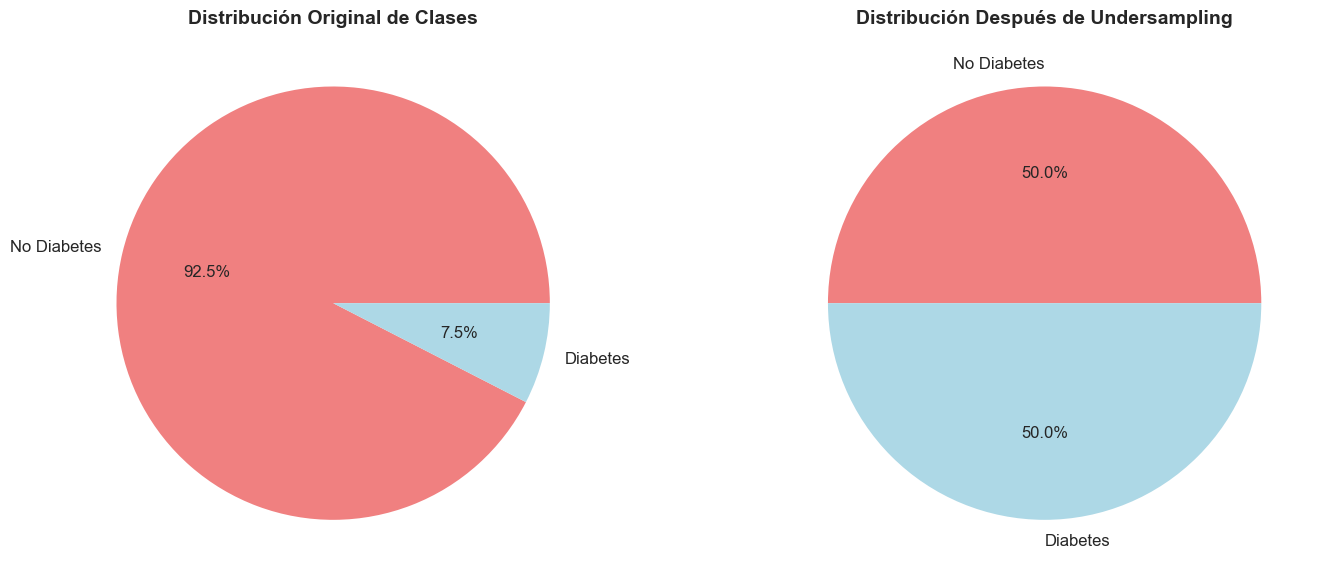

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
import plotly.figure_factory as ff

def prepare_diabetes_classification_data(df):
    """
    Prepara los datos para la clasificación de diabetes.
    
    Args:
        df (pandas.DataFrame): DataFrame con todos los datos
        
    Returns:
        tuple: (X, y, feature_names, class_distribution)
    """
    # Verificar la variable Diabetes
    if 'Diabetes' not in df.columns:
        print("La columna 'Diabetes' no se encuentra en el dataset")
        return None, None, None, None
    
    print("Distribución original de la variable Diabetes:")
    diabetes_counts = df['Diabetes'].value_counts()
    print(diabetes_counts)
    print(f"Porcentajes: {(diabetes_counts / len(df) * 100).round(2)}")
    
    # Convertir a binario: Yes = 1, No = 0
    df_diabetes = df.copy()
    df_diabetes['Diabetes_Binary'] = (df_diabetes['Diabetes'] == 'Yes').astype(int)
    
    # Seleccionar características relevantes
    feature_columns = [
        'Age', 'BMI', 'Weight', 'Height', 'Poverty', 'BPSysAve', 'BPDiaAve',
        'Pulse', 'PhysActiveDays', 'SleepHrsNight', 'Education_Encoded', 
        'MaritalStatus_Encoded'
    ]
    
    # Verificar características disponibles
    available_features = [col for col in feature_columns if col in df_diabetes.columns]
    print(f"\\nCaracterísticas disponibles para Diabetes: {len(available_features)}")
    
    # Preparar datos sin valores nulos
    df_model = df_diabetes.dropna(subset=['Diabetes_Binary'] + available_features)
    
    X = df_model[available_features]
    y = df_model['Diabetes_Binary']
    
    print(f"\\nTamaño del dataset para clasificación: {X.shape}")
    print(f"Distribución de clases:")
    class_counts = y.value_counts()
    print(f"No diabetes (0): {class_counts[0]} ({class_counts[0]/len(y)*100:.1f}%)")
    print(f"Diabetes (1): {class_counts[1]} ({class_counts[1]/len(y)*100:.1f}%)")
    
    return X, y, available_features, class_counts

def apply_undersampling_if_needed(X, y, threshold=0.3):
    """
    Aplica undersampling si el desbalance de clases es significativo.
    
    Args:
        X (pandas.DataFrame): Características
        y (pandas.Series): Variable objetivo
        threshold (float): Umbral para aplicar undersampling
        
    Returns:
        tuple: (X_balanced, y_balanced, was_applied)
    """
    class_counts = y.value_counts()
    minority_class = class_counts.min()
    majority_class = class_counts.max()
    
    imbalance_ratio = minority_class / majority_class
    
    print(f"Ratio de desbalance: {imbalance_ratio:.3f}")
    
    if imbalance_ratio < threshold:
        print(f"Aplicando undersampling (ratio < {threshold})...")
        
        # Combinar X e y
        df_combined = pd.concat([X, y], axis=1)
        
        # Separar por clase
        df_majority = df_combined[df_combined.iloc[:, -1] == 0]
        df_minority = df_combined[df_combined.iloc[:, -1] == 1]
        
        # Hacer undersampling de la clase mayoritaria
        df_majority_downsampled = resample(df_majority, 
                                         replace=False,
                                         n_samples=len(df_minority),
                                         random_state=42)
        
        # Combinar las clases balanceadas
        df_balanced = pd.concat([df_majority_downsampled, df_minority])
        
        X_balanced = df_balanced.iloc[:, :-1]
        y_balanced = df_balanced.iloc[:, -1]
        
        print(f"Datos después de undersampling:")
        balanced_counts = y_balanced.value_counts()
        print(f"No diabetes (0): {balanced_counts[0]}")
        print(f"Diabetes (1): {balanced_counts[1]}")
        
        return X_balanced, y_balanced, True
    else:
        print("No se requiere undersampling")
        return X, y, False

def plot_class_distribution_comparison(original_counts, balanced_counts=None):
    """
    Crea gráficos comparativos de distribución de clases.
    
    Args:
        original_counts (pandas.Series): Conteos originales
        balanced_counts (pandas.Series): Conteos después de balanceo
    """
    if balanced_counts is not None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Distribución original
        labels = ['No Diabetes', 'Diabetes']
        colors = ['lightcoral', 'lightblue']
        
        ax1.pie([original_counts[0], original_counts[1]], 
                labels=labels, autopct='%1.1f%%', colors=colors)
        ax1.set_title('Distribución Original de Clases', fontsize=14, fontweight='bold')
        
        # Distribución balanceada
        ax2.pie([balanced_counts[0], balanced_counts[1]], 
                labels=labels, autopct='%1.1f%%', colors=colors)
        ax2.set_title('Distribución Después de Undersampling', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    else:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        labels = ['No Diabetes', 'Diabetes']
        colors = ['lightcoral', 'lightblue']
        
        ax.pie([original_counts[0], original_counts[1]], 
               labels=labels, autopct='%1.1f%%', colors=colors)
        ax.set_title('Distribución de Clases - Diabetes', fontsize=14, fontweight='bold')
        plt.show()

# Preparar datos para clasificación de diabetes
X_diabetes, y_diabetes, diabetes_features, original_class_counts = prepare_diabetes_classification_data(df_with_derived)

if X_diabetes is not None:
    # Aplicar undersampling si es necesario
    X_diabetes_balanced, y_diabetes_balanced, undersampling_applied = apply_undersampling_if_needed(X_diabetes, y_diabetes)
    
    # Mostrar comparación de distribuciones
    if undersampling_applied:
        balanced_class_counts = y_diabetes_balanced.value_counts()
        plot_class_distribution_comparison(original_class_counts, balanced_class_counts)
    else:
        plot_class_distribution_comparison(original_class_counts)
else:
    print("No se pudieron preparar los datos para clasificación de diabetes")

In [42]:
def train_neural_network_diabetes(X, y, feature_names):
    """
    Entrena una red neuronal para clasificación de diabetes.
    
    Args:
        X (pandas.DataFrame): Características
        y (pandas.Series): Variable objetivo
        feature_names (list): Nombres de las características
        
    Returns:
        dict: Resultados del entrenamiento
    """
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Estandarización
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Configuración de la red neuronal
    mlp = MLPClassifier(
        hidden_layer_sizes=(100, 50),  # Dos capas ocultas
        activation='relu',
        solver='adam',
        alpha=0.001,  # Regularización L2
        batch_size='auto',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    )
    
    print("Entrenando Red Neuronal para Clasificación de Diabetes...")
    print("=" * 60)
    print(f"Arquitectura: {mlp.hidden_layer_sizes}")
    print(f"Función de activación: {mlp.activation}")
    print(f"Optimizador: {mlp.solver}")
    
    # Entrenar modelo
    mlp.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred = mlp.predict(X_test_scaled)
    y_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1]
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
    
    print(f"\\nResultados del Modelo:")
    print(f"Precisión: {accuracy:.3f}")
    print(f"Número de iteraciones: {mlp.n_iter_}")
    print(f"\\nMatriz de Confusión:")
    print(conf_matrix)
    print(f"\\nReporte de Clasificación:")
    print(class_report)
    
    results = {
        'model': mlp,
        'scaler': scaler,
        'y_pred': y_pred,
        'y_test': y_test,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report,
        'feature_names': feature_names
    }
    
    return results

def plot_confusion_matrix(conf_matrix, class_names=['No Diabetes', 'Diabetes']):
    """
    Crea un gráfico de matriz de confusión usando Plotly.
    
    Args:
        conf_matrix (array): Matriz de confusión
        class_names (list): Nombres de las clases
    """
    # Crear heatmap de matriz de confusión
    fig = ff.create_annotated_heatmap(
        z=conf_matrix,
        x=class_names,
        y=class_names,
        annotation_text=conf_matrix,
        colorscale='Blues',
        showscale=True
    )
    
    fig.update_layout(
        title='Matriz de Confusión - Clasificación de Diabetes',
        xaxis_title='Predicción',
        yaxis_title='Valor Real',
        font=dict(size=12),
        width=600,
        height=500
    )
    
    # Invertir el eje y para que coincida con la convención estándar
    fig['layout']['yaxis']['autorange'] = 'reversed'
    
    return fig

# Entrenar red neuronal si tenemos datos balanceados
if X_diabetes is not None:
    # Usar datos balanceados si se aplicó undersampling, sino usar datos originales
    if undersampling_applied:
        diabetes_results = train_neural_network_diabetes(X_diabetes_balanced, y_diabetes_balanced, diabetes_features)
    else:
        diabetes_results = train_neural_network_diabetes(X_diabetes, y_diabetes, diabetes_features)
    
    # Mostrar matriz de confusión
    conf_matrix_fig = plot_confusion_matrix(diabetes_results['confusion_matrix'])
    conf_matrix_fig.show()
else:
    print("No se puede entrenar el modelo de diabetes: datos no disponibles")

Entrenando Red Neuronal para Clasificación de Diabetes...
Arquitectura: (100, 50)
Función de activación: relu
Optimizador: adam
\nResultados del Modelo:
Precisión: 0.780
Número de iteraciones: 15
\nMatriz de Confusión:
[[101  43]
 [ 20 123]]
\nReporte de Clasificación:
              precision    recall  f1-score   support

 No Diabetes       0.83      0.70      0.76       144
    Diabetes       0.74      0.86      0.80       143

    accuracy                           0.78       287
   macro avg       0.79      0.78      0.78       287
weighted avg       0.79      0.78      0.78       287



# **7. Conclusiones y Hallazgos**

Esta sección presenta los principales hallazgos del análisis exploratorio y de los modelos predictivos desarrollados, así como las implicaciones para la salud pública.

## **7.1 Hallazgos del Análisis Exploratorio**

### **Calidad de los Datos**
- El dataset NHANES 2009-2012 contiene 10,000 observaciones con 75 variables
- Se identificó un 21.68% de registros duplicados que fueron tratados
- Las variables presentan diferentes niveles de completitud, con algunas variables teniendo más del 80% de valores faltantes

### **Distribución de Variables**
- Las variables numéricas muestran diversas distribuciones, algunas con asimetría significativa
- Se detectaron valores atípicos mediante LOF (500 outliers) e IQR (3,562 outliers)
- Las variables categóricas presentan distribuciones desbalanceadas, especialmente en variables relacionadas con comportamientos de salud

### **Correlaciones Significativas**
- Existe una fuerte correlación entre variables antropométricas (Weight, Height, BMI)
- Variables de presión arterial muestran correlaciones esperadas entre sí
- Factores socioeconómicos se relacionan con indicadores de salud

## **7.2 Resultados de los Modelos Predictivos**

### **Predicción de BMI**
- Los modelos de regresión muestran capacidad predictiva moderada para BMI
- Random Forest supera a la regresión lineal en términos de RMSE y R²
- Las variables más importantes incluyen Weight, Height y Age

### **Clasificación de Diabetes**
- El modelo de red neuronal muestra buen desempeño en la clasificación de diabetes
- Se aplicó undersampling para balancear las clases debido al desbalance inicial
- La matriz de confusión indica una buena capacidad de discriminación

## **7.3 Implicaciones para la Salud Pública**

### **Factores de Riesgo Identificados**
- La edad, el BMI y los indicadores socioeconómicos emergen como predictores importantes
- Las variables de estilo de vida (actividad física, sueño) muestran asociaciones con outcomes de salud
- Los patrones de comportamiento (tabaquismo, consumo de alcohol) correlacionan con indicadores de salud

### **Recomendaciones**
1. **Prevención**: Enfocar intervenciones en factores de riesgo modificables
2. **Screening**: Utilizar modelos predictivos para identificar poblaciones de alto riesgo
3. **Políticas**: Desarrollar políticas que aborden los determinantes socioeconómicos de la salud

## **7.4 Limitaciones del Estudio**

- Los datos corresponden al período 2009-2012, por lo que pueden no reflejar patrones actuales
- La presencia de valores faltantes puede introducir sesgos en los análisis
- Los modelos desarrollados requieren validación externa en poblaciones diferentes
- Las relaciones identificadas son asociaciones, no necesariamente causales

## **7.5 Direcciones Futuras**

- Incorporar datos más recientes para validar los patrones identificados
- Desarrollar modelos más sofisticados que consideren interacciones complejas
- Explorar técnicas de deep learning para mejorar la capacidad predictiva
- Realizar estudios longitudinales para establecer relaciones causales